In [ ]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
Iirs_def= pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
display(Iirs_def.head())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#LabelEncoder
Encoder1 = LabelEncoder()
Name_iris = Encoder1.fit_transform(Iirs_def['Name'])
#Tabla
Iirs_def = Iirs_def.drop(columns = 'Name')
Iirs_def['Name'] = Name_iris
display(Iirs_def.head())


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X_def = Iirs_def.drop(columns = 'Name')
Y_def = Iirs_def['Name']

In [ ]:
display(X_def.head())

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.linear_model import LinearRegression
def calcular_vif (df, características):     
    vif, tolerancia = {}, {}
    
    for característica in características: 
        
        x = [f for f in características if f != característica]         
        x, y = df[x], df[característica]
         
        r2 = LinearRegression().fit(x, y).score(x, y)                 
        
        
        tolerancia[característica] = 1 - r2
        
        vif[característica] = 1/(tolerancia[característica])
    
    return pd.DataFrame({'VIF': vif, 'Tolerancia': tolerancia})


In [ ]:
calcular_vif(df = X_def,características = ('SepalLength',
                                          'SepalWidth'	,
                                            #'PetalLength',
                                             'PetalWidth'
                                          ))


,VIF,Tolerancia
SepalLength,3.414225,0.292892
SepalWidth,1.294507,0.772495
PetalWidth,3.864678,0.258754


In [ ]:
X_def = Iirs_def.drop(columns = ['Name','PetalLength'])
X = np.array(X_def)
Y = np.array(Y_def)

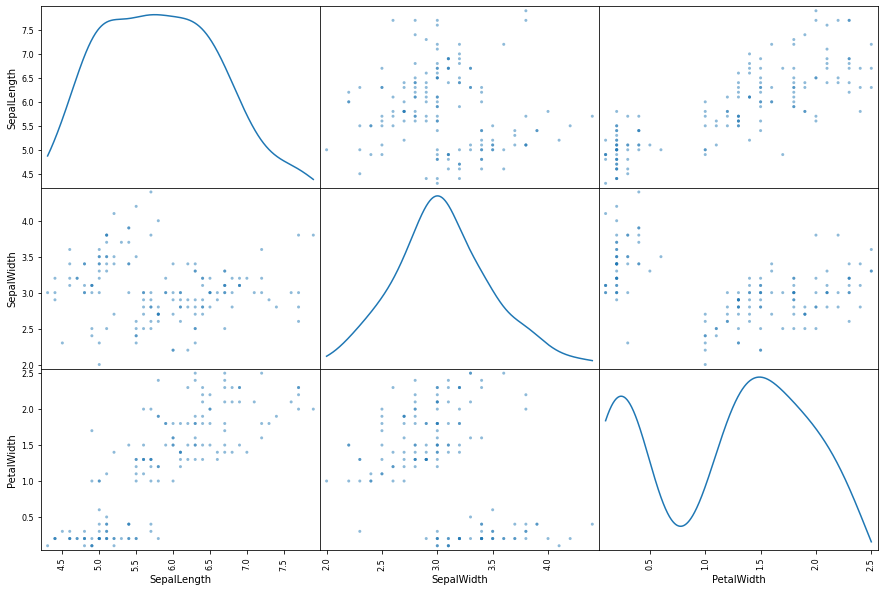

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(X_def,figsize = (15,10) , diagonal = 'kde')
plt.show()

In [ ]:
X_def = Iirs_def.drop(columns = ['Name','PetalLength','PetalWidth'])
X = np.array(X_def)

In [ ]:
from sklearn.preprocessing import MinMaxScaler as MMS
scaler = MMS(feature_range = (0,1))
X = scaler.fit_transform(X)

In [ ]:
print(np.shape(X))
y = np.reshape(Y,(len(Y),1))
print(np.shape(Y))

(150, 2)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import recall_score
mdloRFC = RFC(random_state = 42)
mdloGBC = GBC(random_state = 42)

recall_score_train = []
recall_score_test = []

for i in [mdloRFC,mdloGBC]:
  i.fit(xtrain,ytrain)
  ypredtrain = i.predict(xtrain)
  ypredtest = i.predict(xtest)

  recallscoretrain = recall_score(ytrain,ypredtrain,average = 'micro')
  recallscoretest = recall_score(ytest,ypredtest,average = 'micro')

  recall_score_train.append(recallscoretrain)
  recall_score_test.append(recallscoretest)

dicc = {'Modelo':['Random Forest Classifier','Gradient Boosting Classifier']}
dicc_def = pd.DataFrame(dicc)
dicc_def['recall score train'] = recall_score_train
dicc_def['recall score test'] = recall_score_test
display(dicc_def)

,Modelo,recall score train,recall score test
0,Random Forest Classifier,0.941667,0.766667
1,Gradient Boosting Classifier,0.941667,0.833333


In [ ]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
import pandas as pd
melbour_0_def = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
display(melbour_0_def.head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
melb_df = melbour_0_def.drop(melbour_def.columns[[0,1,5,6,7,8,9,15,16,17,18,19,20]], axis = 'columns')
display(melb_df.head())

,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,2,h,1480000.0,2.0,1.0,1.0,202.0,NaN
1,2,h,1035000.0,2.0,1.0,0.0,156.0,79.0
2,3,h,1465000.0,3.0,2.0,0.0,134.0,150.0
3,3,h,850000.0,3.0,2.0,1.0,94.0,NaN
4,4,h,1600000.0,3.0,1.0,2.0,120.0,142.0


In [ ]:
#LabelEncoder
encoder2 = LabelEncoder()
Type = encoder2.fit_transform(melb_df['Type'])
melbour_1_def = melb_df.drop(columns = 'Type')
melbour_1_def['Type'] = Type
display(melbour_1_def.head())

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Type
0,2,1480000.0,2.0,1.0,1.0,202.0,NaN,0
1,2,1035000.0,2.0,1.0,0.0,156.0,79.0,0
2,3,1465000.0,3.0,2.0,0.0,134.0,150.0,0
3,3,850000.0,3.0,2.0,1.0,94.0,NaN,0
4,4,1600000.0,3.0,1.0,2.0,120.0,142.0,0


In [ ]:
from sklearn.impute import SimpleImputer
Build = np.array(melb_df['BuildingArea'])
Build = np.reshape(Build,(len(Build),1))
imput1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Building = imput1.fit_transform(Build)
melbour_2_def = melbour_1_def.drop(columns = ['BuildingArea','Car'])
melbour_2_def['BuildingArea'] = Building


C = np.array(melb_df['Car'])
C = np.reshape(C,(len(C),1))
Car = imput1.fit_transform(C)
melbour_2_def['Car'] = Car
display(melbour_2_def.head())

,Rooms,Price,Bedroom2,Bathroom,Landsize,Type,BuildingArea,Car
0,2,1480000.0,2.0,1.0,202.0,0,151.96765,1.0
1,2,1035000.0,2.0,1.0,156.0,0,79.00000,0.0
2,3,1465000.0,3.0,2.0,134.0,0,150.00000,0.0
3,3,850000.0,3.0,2.0,94.0,0,151.96765,1.0
4,4,1600000.0,3.0,1.0,120.0,0,142.00000,2.0


In [ ]:
Xm_def = melbour_2_def.drop(columns = 'Type')
Ym_def = melbour_2_def['Type']

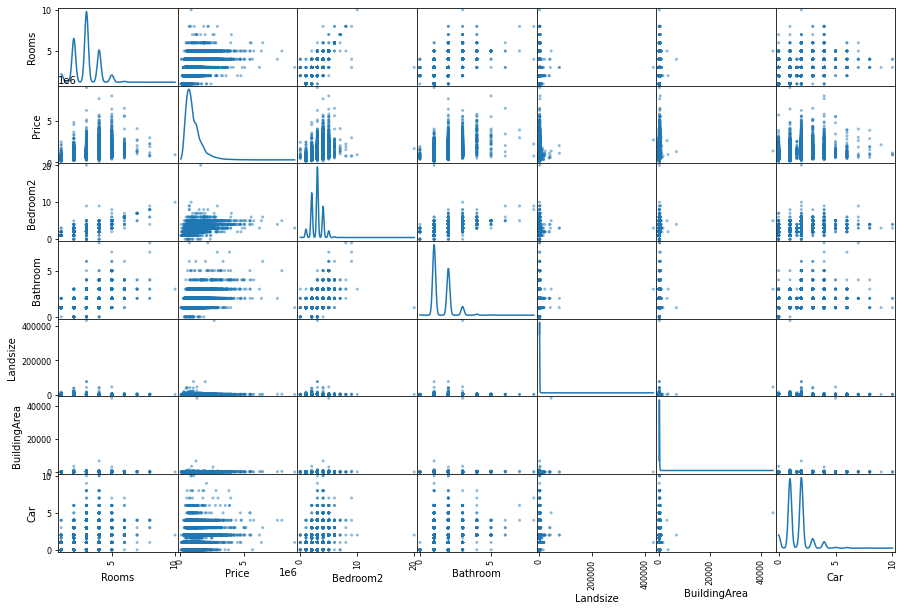

In [ ]:
pd.plotting.scatter_matrix(Xm_def,figsize = (15,10) , diagonal = 'kde')
plt.show()

In [ ]:
calcular_vif(df = Xm_def, características=(#'Rooms',
                                          'Price',
                                          'Bedroom2',
                                          'Bathroom',
                                          'Car',
                                          'Landsize',
                                          'BuildingArea'
                                          )  )

,VIF,Tolerancia
Price,1.392408,0.718180
Bedroom2,1.777485,0.562593
Bathroom,1.653361,0.604829
Car,1.214099,0.823656
Landsize,1.010472,0.989636
BuildingArea,1.019457,0.980915


In [ ]:
Xm_1 =melbour_2_def.drop(columns = ['Type','Rooms'])
Xm_1_def = np.array(melbour_2_def.drop(columns = ['Type','Rooms']))
Ym_1 = np.array(Ym_def)
Ym_1 = np.reshape(Ym_1,(len(Ym_1),1))
print(np.shape(Ym_1))

(13580, 1)


In [ ]:
scaler4 = MMS()
Xm_3= scaler4.fit_transform(Xm_1_def)
print(Xm_3)

[[1.56477846e-01 1.00000000e-01 1.25000000e-01 4.66497619e-04
  3.41385263e-03 1.00000000e-01]
 [1.06561974e-01 1.00000000e-01 1.25000000e-01 3.60265488e-04
  1.77468269e-03 0.00000000e+00]
 [1.54795289e-01 1.50000000e-01 2.50000000e-01 3.09458817e-04
  3.36965068e-03 0.00000000e+00]
 ...
 [1.21704992e-01 1.50000000e-01 2.50000000e-01 1.00689585e-03
  3.41385263e-03 4.00000000e-01]
 [2.70891755e-01 2.00000000e-01 1.25000000e-01 1.99993534e-03
  3.52690104e-03 5.00000000e-01]
 [1.34604599e-01 2.00000000e-01 1.25000000e-01 8.36000684e-04
  2.51600584e-03 1.00000000e-01]]


In [ ]:
Xm_3train,Xm_3test,ym_1train,ym_1test = tts(Xm_3,Ym_1,test_size = 0.2, random_state = 42)

In [ ]:
mdlo1RFC = RFC(random_state = 42)
mdlo1RFC.fit(Xm_3train,ym_1train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [ ]:
ympredtrain = mdlo1RFC.predict(Xm_3train)
ympredtest= mdlo1RFC.predict(Xm_3test)

rsmtrain = recall_score(ym_1train,ympredtrain, average = 'micro')
rsmtest= recall_score(ym_1test,ympredtest, average = 'micro')

dicc_m = {'Modelo':['Random Forest Classifier'],'recall score train':[rsmtrain],'recall score test':[rsmtest]}
dicc_m_def = pd.DataFrame(dicc_m)
display(dicc_m_def)

,Modelo,recall score train,recall score test
0,Random Forest Classifier,0.998711,0.871502


In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
pca1.fit(Xm_3)
Xpca = pca1.transform(Xm_3)

Xpcatrain,Xpcatest,ym_1train,ym_1test = tts(Xpca,Ym_1,test_size = 0.2,random_state = 42)

mdlo2RFC = RFC(random_state = 42)
mdlo2RFC.fit(Xpcatrain,ym_1train)

ypcapredtrain = mdlo2RFC.predict(Xpcatrain)
ypcapredtest= mdlo2RFC.predict(Xpcatest)

rsmtrain2 = recall_score(ym_1train,ypcapredtrain, average = 'micro')
rsmtest2 = recall_score(ym_1test,ypcapredtest, average = 'micro')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [ ]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
from sklearn.metrics import r2_score
wine_def = pd.read_excel('/content/wine.xlsx')
display(wine_def)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [ ]:
dicc_2_m = {'Modelo':['Random Forest Classifier PCA'],'recall score train':[rsmtrain2],'recall score test':[rsmtest2]}
dicc_2_m_def = pd.DataFrame(dicc_2_m)
display(dicc_2_m_def)

,Modelo,recall score train,recall score test
0,Random Forest Classifier PCA,0.996778,0.770987


In [ ]:
W_def = wine_def.drop(columns = ['Unnamed: 0','description','designation','region_1','region_2','winery'])
W_def = W_def.dropna()
display(W_def)

,country,points,price,province,variety
0,US,96,235.0,California,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,US,96,90.0,California,Sauvignon Blanc
3,US,96,65.0,Oregon,Pinot Noir
4,France,95,66.0,Provence,Provence red blend
...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,White Blend
150926,France,91,27.0,Champagne,Champagne Blend
150927,Italy,91,20.0,Southern Italy,White Blend
150928,France,90,52.0,Champagne,Champagne Blend


In [ ]:
encoder = LabelEncoder()
X_def = W_def.drop(columns = ['price'])

labelencoder = LabelEncoder()
country = labelencoder.fit_transform(np.array(W_def['country']))
points = labelencoder.fit_transform(np.array(W_def['points']))
province = labelencoder.fit_transform(np.array(W_def['province']))
variety = labelencoder.fit_transform(np.array(W_def['variety']))


X_def = X_def.drop(columns = ['points','province','variety'])
X_def['country'] = country
X_def['points'] = points
X_def['province'] = province
X_def['variety'] = variety



X_array = np.array(X_def)

y_def = W_def['price']
y_array = np.array(y_def)

In [ ]:
print(np.shape(X_array))
print(np.shape(y_array))
y_array = np.reshape(y_array,(len(y_array),1))
print(np.shape(y_array))

(137230, 4)
(137230, 1)
(137230, 1)


In [ ]:
scaler = MMS(feature_range = (0,1))
X_array = scaler.fit_transform(X_array)

In [ ]:
Xtrain,Xtest,ytrain,ytest = tts(X_array,y_array, random_state = 42, test_size = 0.2) #dividimos la data

from sklearn.ensemble import RandomForestRegressor as RFR
mdloRFR = RFR(random_state = 42, n_estimators =200)

mdloRFR.fit(Xtrain,ytrain) 

#verificar resultados
ypredtest = mdloRFR.predict(Xtest)
ypredtrain = mdloRFR.predict(Xtrain)

r2scoretest = r2_score(ytest,ypredtest)
r2scoretrain = r2_score(ytrain,ypredtrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
dicc_w = {'Modelo':['Random Forest Regressor'],'r2 score train':[r2scoretrain],'r2 score test':[r2scoretest]}
dicc_w_def = pd.DataFrame(dicc_w)
display(dicc_w_def)
print('Modelo mínimamente generalizado')

,Modelo,r2 score train,r2 score test
0,Random Forest Regressor,0.59122,0.547171


Modelo mínimamente generalizado


In [ ]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
cancer_def = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
display(cancer_def.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
cancer1_def = cancer_def.drop(columns = ['id'])
display(cancer1_def.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#LabelEncoder
encoder2 = LabelEncoder()
diagnosis = encoder2.fit_transform(cancer1_def['diagnosis'])

In [ ]:
cancer2_def = cancer1_def.drop(columns = ['diagnosis'])
cancer2_def['diagnosis'] = diagnosis
display(cancer2_def.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
Xc_def = cancer2_def.drop(columns = 'diagnosis')
Yc_def = cancer2_def['diagnosis']

In [ ]:
calcular_vif(df = Xc_def,características = (#'radius_mean',
                                           'texture_mean',
                                           #'perimeter_mean'	,
                                           #'area_mean',
                                            'smoothness_mean',
                                            #'compactness_mean',
                                           #'concavity_mean',
                                           #'concave points_mean',
                                           'symmetry_mean',
                                           'fractal_dimension_mean',
                                           #'radius_se',
                                           'texture_se',	
                                           'perimeter_se',	
                                           #'area_se',
                                           'smoothness_se',
                                           #'compactness_se',	
                                           'concavity_se',
                                           'concave points_se',
                                           'symmetry_se',
                                           'fractal_dimension_se',
                                           #'radius_worst',
                                           #'texture_worst',
                                           #'perimeter_worst',
                                           'area_worst',	
                                           #'smoothness_worst',
                                           #'compactness_worst',
                                           #'concavity_worst',
                                           #'concave points_worst',
                                           'symmetry_worst',
                                           #'fractal_dimension_worst'	
    
))

,VIF,Tolerancia
texture_mean,1.615666,0.618940
smoothness_mean,2.762636,0.361973
symmetry_mean,3.026111,0.330457
fractal_dimension_mean,4.525553,0.220967
texture_se,2.001627,0.499594
perimeter_se,4.265756,0.234425
smoothness_se,1.878515,0.532335
concavity_se,3.609423,0.277053
concave points_se,3.659977,0.273226
symmetry_se,2.660047,0.375933


In [ ]:
x1_c_def = Xc_def.drop(columns = ['radius_mean','perimeter_mean',
                                'area_mean','compactness_mean',
                                'concavity_mean','concave points_mean',
                                'radius_se','area_se','compactness_se',	
                                'radius_worst','texture_worst',
                                'perimeter_worst','smoothness_worst',
                                'compactness_worst','concavity_worst',
                                'concave points_worst','fractal_dimension_worst'])
display(x1_c_def.head())


,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,area_worst,symmetry_worst
0,10.38,0.11840,0.2419,0.07871,0.9053,8.589,0.006399,0.05373,0.01587,0.03003,0.006193,2019.0,0.4601
1,17.77,0.08474,0.1812,0.05667,0.7339,3.398,0.005225,0.01860,0.01340,0.01389,0.003532,1956.0,0.2750
2,21.25,0.10960,0.2069,0.05999,0.7869,4.585,0.006150,0.03832,0.02058,0.02250,0.004571,1709.0,0.3613
3,20.38,0.14250,0.2597,0.09744,1.1560,3.445,0.009110,0.05661,0.01867,0.05963,0.009208,567.7,0.6638
4,14.34,0.10030,0.1809,0.05883,0.7813,5.438,0.011490,0.05688,0.01885,0.01756,0.005115,1575.0,0.2364


In [ ]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(x1_c_def,figsize = (15,10) , diagonal = 'kde')
plt.show()


In [101]:
from sklearn.preprocessing import MinMaxScaler as MMS
scaler1 = MMS(feature_range = (0,1))
X2_c = scaler1.fit_transform(x1_c_def)
Y2_c = np.array(Yc_def)
Y2_c = np.reshape(Y2_c,(len(Y2_c),1))
print(np.shape(Y2_c))
print(np.shape(X2_c))

(569, 1)
(569, 13)


In [103]:
from sklearn.model_selection import train_test_split as tts
X2_ctrain,X2_ctest,Y2_ctrain,Y2_ctest = tts(X2_c,Y2_c,test_size = 0.2,random_state = 42)

In [104]:
import tensorflow as tf
ModeloClasificador = tf.keras.Sequential([
        tf.keras.Input(shape = (13,)),
        tf.keras.layers.Dense(13,activation = 'relu'),
        tf.keras.layers.Dense(60,activation = 'relu'),
        tf.keras.layers.Dense(30,activation = 'relu'),
        tf.keras.layers.Dense(10,activation = 'relu'),
        tf.keras.layers.Dense(4,activation = 'relu'),
        tf.keras.layers.Dense(2,activation = 'relu'),
        tf.keras.layers.Dense(1,activation = 'softmax')
       
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,
                           optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')
historico = ModeloClasificador.fit(X2_ctrain,Y2_ctrain, epochs = 500,verbose = False)

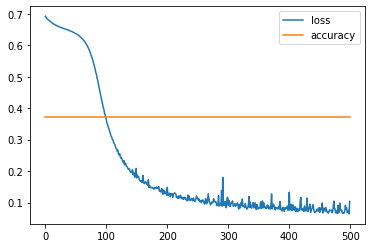

In [105]:
pd.DataFrame(historico.history).plot()

In [107]:
ypredtrain2 = np.round(ModeloClasificador.predict(X2_ctrain),0)
ypredtest2 = np.round(ModeloClasificador.predict(X2_ctest),0)

rcstrain = recall_score(Y2_ctrain,ypredtrain2)
rcstest = recall_score(Y2_ctest,ypredtest2)

dicc1 = {'Modelo':['GradientBoostingClassifier'],'recall score train':[rcstrain],'recall score test':[rcstest]}
dicc1_def = pd.DataFrame(dicc1)
display(dicc1_def)

,Modelo,recall score train,recall score test
0,GradientBoostingClassifier,1.0,1.0


In [108]:
"""
Crea una función que aplane la ruta de una imagen
"""
from PIL import Image
import matplotlib.pyplot as plt
def picture(ruta):
  img = plt.imread(ruta)
  vector = img.flatten()
  return vector

In [109]:
picture(ruta = '/content/gato-marron_0.webp')

array([229, 203, 184, ..., 211, 142,  74], dtype=uint8)